This script performs Principal Component Analysis (PCA) on the Iris dataset to reduce its dimensionality while preserving key variance. It explores how PCA compresses the dataset while preserving key information and provides interactive visual insights into the transformation.

In [9]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
# Set up plotting environment
sb.set_style('whitegrid')

In [10]:
# Load dataset from CSV
path = "../../../Datasets/iris.csv"
iris = pd.read_csv(path)

In [13]:
iris.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
# Extract features and target
X = iris.iloc[:, :-1]  # Select all columns except the last (features)
Y = iris.iloc[:, -1]   # Select the last column (species labels)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for PCA scores
df_scores = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_scores['Species'] = Y  # Add species labels

In [26]:
df_scores.head()

,PC1,PC2,Species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


In [30]:
# 2D scatter plot of PCA scores
fig3 = px.scatter(df_scores, x='PC1', y='PC2', color='Species', symbol='Species', opacity=0.7)
fig3.update_layout(margin=dict(l=0, r=0, t=0))
fig3.show()

### Explained variance

In [ ]:
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.insert(explained_variance, 0, 0))

# Create DataFrame for variance analysis
df_explained_variance = pd.DataFrame({
    'PC': ['', 'PC1', 'PC2'],
    'Explained Variance': np.insert(explained_variance, 0, 0),
    'Cumulative Variance': cumulative_variance
})

In [32]:

# Plot explained variance
fig1 = px.bar(df_explained_variance.iloc[1:], x='PC', y='Explained Variance', 
              text='Explained Variance', width=600)
fig1.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig1.show()

In [33]:
# Plot cumulative variance and explained variance
fig2 = go.Figure()
fig2.add_trace(go.Scatter(x=df_explained_variance['PC'], y=df_explained_variance['Cumulative Variance'], 
                          marker=dict(size=15, color="LightSeaGreen"), name="Cumulative Variance"))
fig2.add_trace(go.Bar(x=df_explained_variance['PC'], y=df_explained_variance['Explained Variance'], 
                      marker=dict(color="RoyalBlue"), name="Explained Variance"))
fig2.show()

The df_loadings DataFrame represents the PCA loadings, which tell us how much each original feature contributes to the principal components (PCs).

Definition of PCA Loadings:
PCA loadings are the weights (coefficients) assigned to each original feature when computing the principal components.
They indicate how strongly each feature is correlated with a given principal component.

Why is df_loadings Useful?
Feature Importance:

It helps us understand which features contribute most to each principal component.
Higher absolute values mean stronger influence.
Interpreting PCs:

If PC1 has large positive loadings for petal length & width, we can infer that PC1 captures petal size variation.
3D Scatter Plot (Loadings Visualization):

We use df_loadings to visualize how features are distributed in the PCA space:

In [38]:
# Retrieve PCA loadings (only PC1 and PC2)
df_loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=iris.columns[:-1])
df_loadings

,PC1,PC2
Sepal Length (cm),0.521066,0.377418
Sepal Width (cm),-0.269347,0.923296
Petal Length (cm),0.580413,0.024492
Petal Width (cm),0.564857,0.066942


In [ ]:
# 2D scatter plot of PCA loadings
# Similar to the heatmap below (groups are more corrolated)
fig4 = px.scatter(df_loadings, x='PC1', y='PC2', text=df_loadings.index)
fig4.update_traces(textposition='top center')
fig4.show()

### Perform full PCA for additional analysis

In [44]:
pca_full = PCA()
iris_pca = pca_full.fit_transform(X_scaled)

In [45]:
# Output explained variance ratios
print("Explained Variance Ratios:", pca_full.explained_variance_ratio_)
print("Sum of Explained Variance:", pca_full.explained_variance_ratio_.sum())

Explained Variance Ratios: [0.72962445 0.22850762 0.03668922 0.00517871]
Sum of Explained Variance: 0.9999999999999999


   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)
0           0.521066         -0.269347           0.580413          0.564857
1           0.377418          0.923296           0.024492          0.066942
2          -0.719566          0.244382           0.142126          0.634273
3          -0.261286          0.123510           0.801449         -0.523597


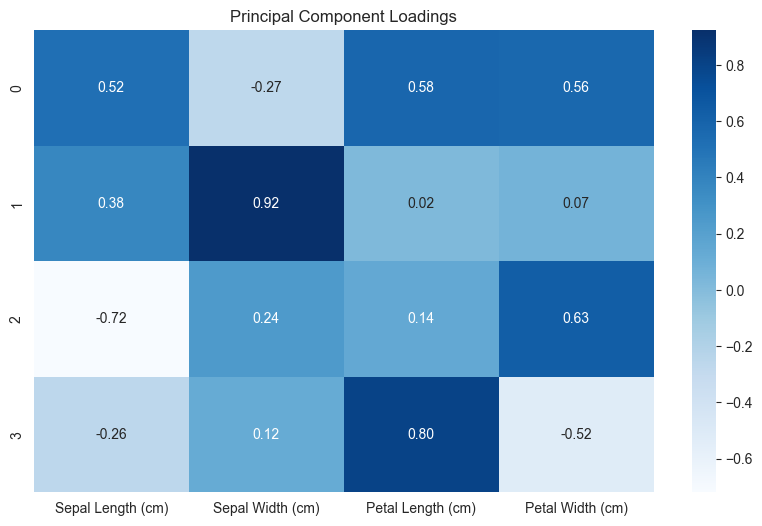

In [48]:
# Display principal component vectors
df_comps = pd.DataFrame(pca_full.components_, columns=iris.columns[:-1])
print(df_comps)

# Visualize principal components with heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(df_comps, cmap="Blues", annot=True, fmt=".2f")
plt.title("Principal Component Loadings")
plt.show()

#### (NEXT) EDA using PCA findings

Do EDA to Interpret Feature Relationships

Petal-based features (length & width) are dominant in PC1, meaning they might correlate strongly with classification (e.g., predicting iris species).

Sepal Width is dominant in PC2, meaning it captures an independent aspect (e.g., species differentiation by shape).

If Petal Length and Petal Width contribute similarly, keeping only one might suffice.